In [3]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [4]:
titanic_df = pd.read_csv('train.csv')

In [6]:
titanic_df.head()
# parch - childern on board
# pclass - passenger class 1,2,3
# embarked - s,c,q, cities

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [7]:
# Information about the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


### All good data analysis projects begin with trying to answer questions

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills

First some basic questions:

1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5. What factors helped someone survive the sinking?

So let's start with the first question: Who were the passengers on the titanic?


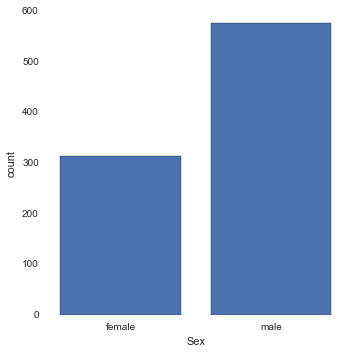

In [10]:
# Look at gender first

sns.factorplot('Sex', data = titanic_df)

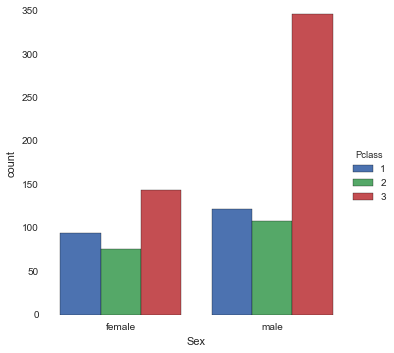

In [12]:
# Add a nested categorical variable with the hue 
sns.factorplot('Sex',data = titanic_df, hue = 'Pclass')

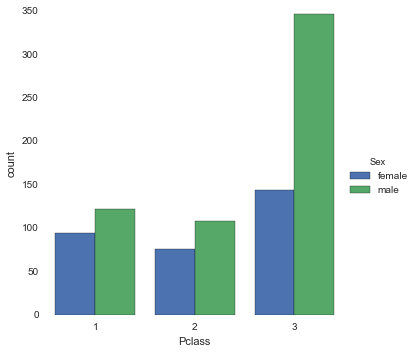

In [15]:
sns.factorplot('Pclass', data = titanic_df, hue = 'Sex')

In [26]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [27]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply( male_female_child,axis=1)

In [28]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


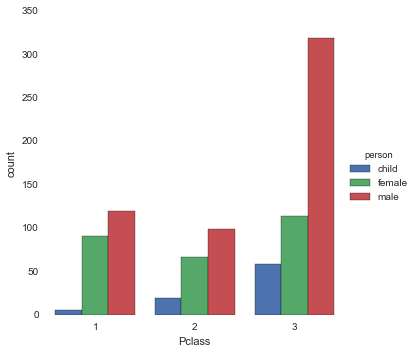

In [29]:
sns.factorplot('Pclass',data=titanic_df, hue = 'person')

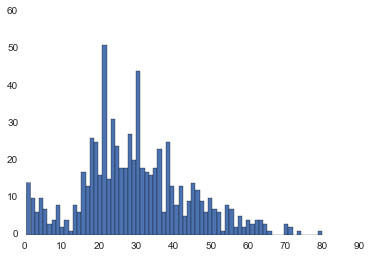

In [30]:
titanic_df['Age'].hist(bins=70)

In [31]:
titanic_df['Age'].mean()

29.69911764705882

In [32]:
# We could also get a quick overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
dtype: int64

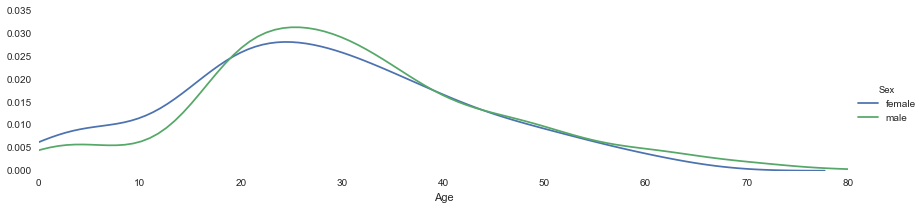

In [38]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 4)

fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

# Another way to visualize the data is to use FacetGrid to plot multiple kdeplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice

# Set the x max limit by the oldest passenger

#Since we know no one can be negative years old set the x lower limit at 0

#Finally add a legend

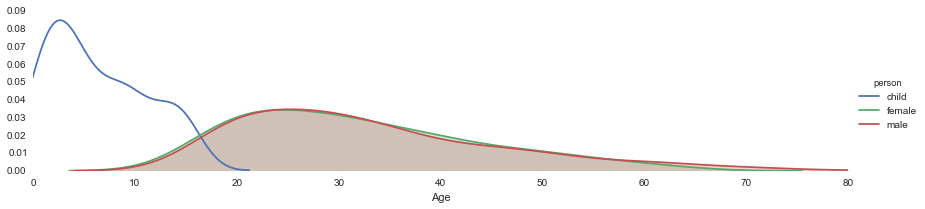

In [39]:
fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4)

fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

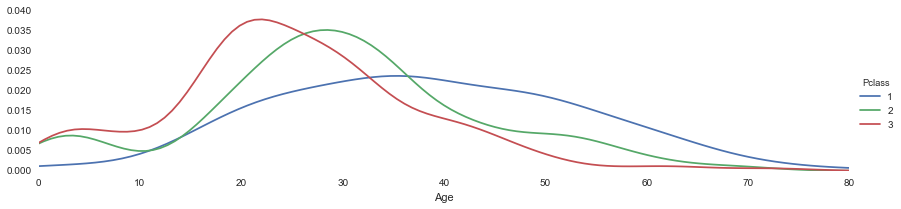

In [40]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)

fig.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

What deck were the passengers on and how does that relate to their class?

In [41]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [42]:
deck = titanic_df['Cabin'].dropna()

In [43]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

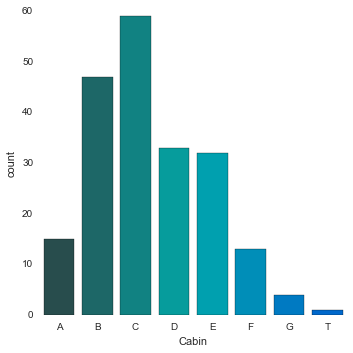

In [44]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data = cabin_df, palette = 'winter_d')

Interesting to note we have a 'T' deck value there which doesn't make sense, we can drop it out with the following code:

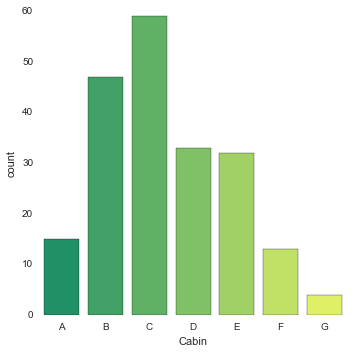

In [47]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin',data = cabin_df, palette = 'summer')

In [48]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


3. Where did the passengers come from?

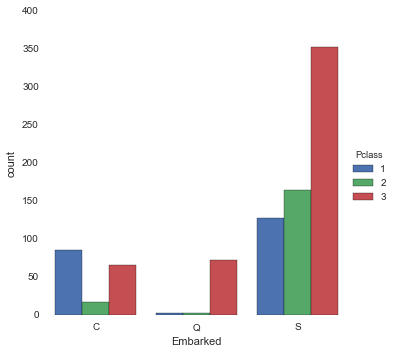

In [50]:
sns.factorplot('Embarked', data =titanic_df, hue = 'Pclass', x_order = ['C','Q','S'])

Who was alone and who was with family?

In [51]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [52]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [53]:
titanic_df['Alone']

0     1
1     1
2     0
3     1
4     0
5     0
6     0
7     4
8     2
9     1
10    2
11    0
12    0
13    6
14    0
...
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    5
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [54]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0 ] = "With Family"

titanic_df['Alone'].loc[titanic_df['Alone'] == 0 ] = "Alone"

c:\Users\James\Anaconda\lib\site-packages\pandas\core\indexing.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


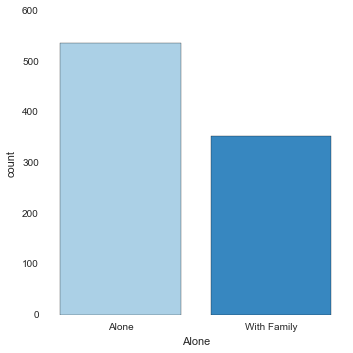

In [57]:
sns.factorplot('Alone', data = titanic_df, palette = "Blues")

Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: What factors helped someone survive the sinking?

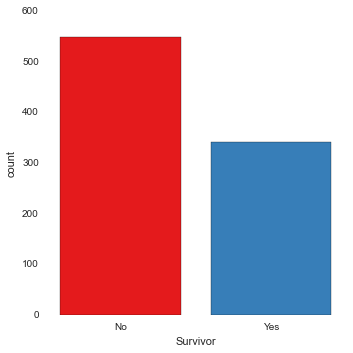

In [59]:
# Mapping is a great way to do element-wise transfomations and other data cleaning operations!

titanic_df['Survivor'] = titanic_df.Survived.map({0:'No',1:'Yes'})

sns.factorplot('Survivor',data = titanic_df, palette = 'Set1')

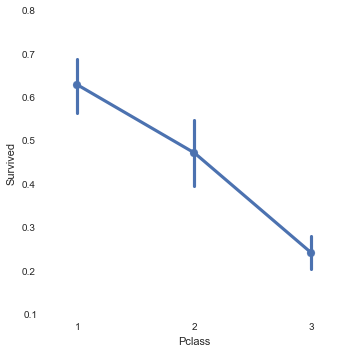

In [60]:
sns.factorplot('Pclass','Survived', data = titanic_df)

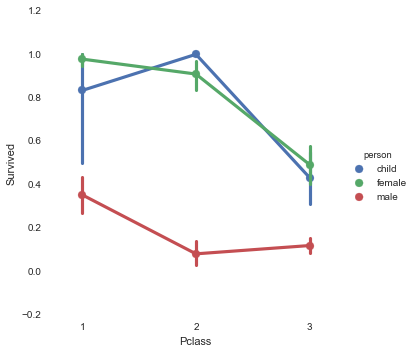

In [62]:
sns.factorplot('Pclass','Survived', hue = 'person', data = titanic_df)

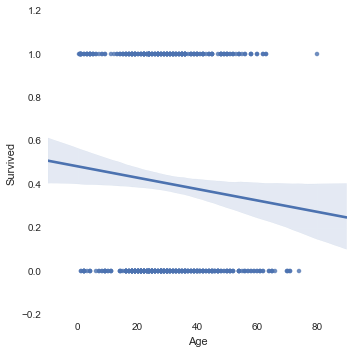

In [64]:
sns.lmplot('Age', 'Survived', data = titanic_df)

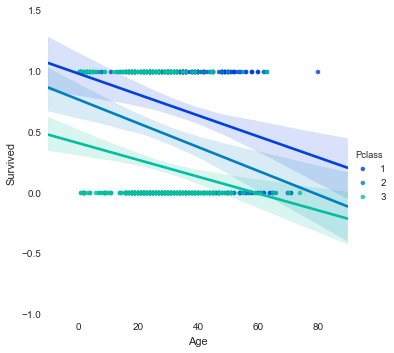

In [66]:
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'winter')

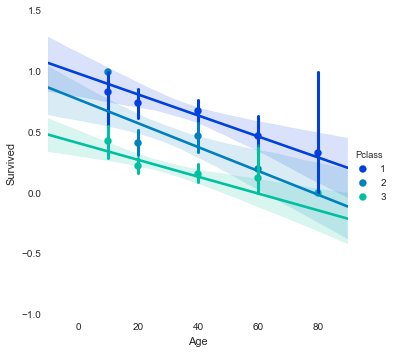

In [67]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived', hue = 'Pclass', data = titanic_df, palette = 'winter', x_bins = generations)

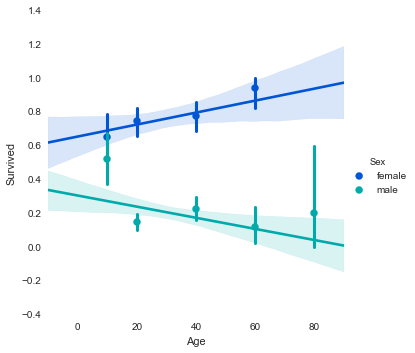

In [69]:
sns.lmplot('Age','Survived', hue = 'Sex', data = titanic_df, palette = 'winter', x_bins = generations)

1. Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
2. Did having a family member increase the odds of surviving the crash?
